<a href="https://colab.research.google.com/github/CBDRH-HDAT9500/week05/blob/master/Week-05-Exercise01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)

---

<br>
© 2022 Copyright The University of New South Wales - CRICOS 00098G

**Author**: Oscar Perez-Concha: o.perezconcha@unsw.edu.au

**Contributors/Co-authors**: Marta Fredes-Torres and Zhisheng (Sandy) Sa.

# Week 7: Artificial Neural Networks / Deep Learning
# Exercise 01:


# 1. Introduction

In this exercise, we will build our first dense neural network using Keras. Exciting!


## 1.1. Aims of the Exercise:

1. This is an introduction to Artificial Neural Networks / Deep Learning.
2. We will use Keras, a high-level API built on top of Tensorflow.
It aligns with all of the learning outcomes of our course:

1.	Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2.	Design machine learning tasks for Health Data Science scenarios.


## 1.2. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.

## 1.3. Tips
1. Run all the cells in sequence (one at a time), using the "Run" button.
2. To edit this notebook, just double-click in each cell. Choose between "Code" cell or text "Markdown" cell in the combo-box above.
3. If you want to save your notebook, please go File->Save a copy on Drive/GitHub.
4. To clean the content of all cells and re-start Notebook, please go to Edit->Clear all outputs then Runtime->Restart runtime

Follow the instructions given and if you have any questions, please use the **Comments section** in **Open Learning**.

# 2. Docstring:

Create a docstring with the variables and constants that you will use in this exercise (data dictionary) and the purpose of your program. It is expected that you choose informative variable names and document your program (both docstrings and comments).

<b> Write the answer here:</b>

#####################################################################################################################

(double-click here)


#####################################################################################################################

# 3. Reading and Manipulating Malaria Cell Images Data set

<font color=green><b> Aim/Goal</b>: In this week, we will detect malaria cells that are parasitized with ANN (Artificial Neural Networks) algorithms. </font> We will use two sets of data that contain images of infected and uninfected cells. More information see[Tensorflow Malaria](https://www.tensorflow.org/datasets/catalog/malaria) and [NLM - Malaria Data](https://lhncbc.nlm.nih.gov/LHC-research/LHC-projects/image-processing/malaria-datasheet.html)

In [1]:
# check required libraries are installed if not calling system to install
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas', 'plotnine', 'matplotlib', 'seaborn',
            'grid', 'lime', 'shap', 'scikit-learn', 'tensorflow'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    print('Installing: ', missing)
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
# delete unwanted variables
del required
del installed
del missing

Installing:  {'grid', 'shap', 'lime'}


In [2]:
import sys
print(sys.version)

import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import random
import warnings; warnings.simplefilter('ignore')

3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]


In [3]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Mounted at /content/drive


If you are running this notebook in Google Colab, you must define your project paths. In this case, define your `project_path`. Otherwise, the model output will be lost after you close the session.

In [5]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    # T
    project_path = Path(root) / 'MyDrive' / 'HDAT9500' / 'week07'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()

## 3.1 Dataset
The original Malaria cell image dataset can be downloaded from [Kaggle](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria?resource=download)

The image dataset need to processed into array before feeding into ANN. Data preparation code are stored in a separate notebook called **Week-05-data-preparation.ipynnb**

Now let's have a look what these images look like first:

**The parasitized images**

![alt text](https://drive.google.com/uc?export=view&id=1a2Qopc2ejiW3RkpLOCIge4b42tYIEaqq)

![alt text](https://drive.google.com/uc?export=view&id=1cEJxQmXAcgc0f8Mo8hSsSO9s5m183Qil)

![alt text](https://drive.google.com/uc?export=view&id=1BM-l4FO1ClvtjqA9D397ZDwjkrit8bYn)

![alt text](https://drive.google.com/uc?export=view&id=1CZJitEjxDcbtKzOSXvv1LiETwxQloLEi)

**The uninfected images**

![alt text](https://drive.google.com/uc?export=view&id=1ak0EI4p5w387kxmeLuUuIr5MTL6kY5se)

![alt text](https://drive.google.com/uc?export=view&id=1HB8wJyfrFTSTijmck4nsS90iMUQhDpaI)

![alt text](https://drive.google.com/uc?export=view&id=11Xvt0uCFlT3r7s7Bj6d8a99z29ZkJgQJ)

![alt text](https://drive.google.com/uc?export=view&id=1a0UdWFtY7FxUrlXgVGTqoI-qIdEQZRsI)


**Now let's load the processed data**

The images were resized to (64x64) and transformed into a 1D vector then saved as a data list called 'data'. The label of the images was saved in a separate data list called 'labels' in a compressed data file.


In [6]:
data_path = Path(project_path) / 'data' /  'malaria_img.npz'
with np.load(data_path) as img:
    data = img['data']
    labels = img['labels']

In [7]:
# Printing the shape of the data list and labels
print('Cells : {} | labels : {}'.format(data.shape , labels.shape))

Cells : (27558, 12288) | labels : (27558,)


## 3.3 Splitting the dataset into the Training set and Test set

It is <font color=purple>**very important to scale**</font> our features when we use ANNs. In this particular example, all the features are already in the same scale because we are dealing with pixels whose values are between [0,1].

Therefore, we are not going to scale for that reason.  

But when dealing with data that are not scaled, bear in mind that we should use a pipeline as we did in the past weeks in order to scale our features before being fed to the ANN.

In [8]:
# Sanity check that data values are between [0,1]
print('No data smaller than 0:', data[data<0])
print('No data higher than 1:', data[data>1])

print('print data higher than 0:', data[data>=0])
print('print data higher than 0.1:', data[data>=0.1])
print('print data higher than 0.5:', data[data>=0.5])
print('print data higher than 0.5:', data[data>=0.9])

No data smaller than 0: []
No data higher than 1: []
print data higher than 0: [0. 0. 0. ... 0. 0. 0.]
print data higher than 0.1: [0.10058977 0.8095167  0.47208562 ... 0.19573687 0.20504151 0.20645538]
print data higher than 0.5: [0.8095167 0.5582415 0.8116766 ... 0.7546219 0.7907126 0.7961967]
print data higher than 0.5: [0.90121305 0.90391296 0.90254384 ... 0.90535814 0.9083625  0.90008044]


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0, stratify = labels)

In [10]:
# Sanity Check
print(f'SHAPE OF TRAINING IMAGE DATA : {X_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {X_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 12288)
SHAPE OF TESTING IMAGE DATA : (5512, 12288)
SHAPE OF TRAINING LABELS : (22046,)
SHAPE OF TESTING LABELS : (5512,)


# 4. Our first ANN using Keras


In [11]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Flatten
from keras import backend as K
from keras import optimizers

### <font color='brown'> Question 1: Go to the section titled <b>Creating the model using the Sequential API</b> in the book:</font>

<font color='brown'>a. Write code to initialise ANN. </font>

<font color='brown'>b. Create a first hidden layer with 16 nodes and a relu activation function. Use the function `add` and  the argument `input_dim` since the data have been flatten out already (see the data prepartion notebook).</font>

<font color='brown'>c. Create a second hidden layer with 16 nodes and a relu activation function. Use the function `add`.</font>

<font color='brown'>d. Add output layer: Using the functions "add" and "dense". What activation function would you use and why? </font>

<font color='green'>Help: </font>

1. [Additional information about how to use the function `add` by using the argument `input_dim`](https://keras.io/getting-started/sequential-model-guide/)
2. [Function `dense`](https://keras.io/layers/core/#dense)
3. [Activation functions other than relu](https://keras.io/api/layers/activations/)
4. [Read here how to use the function `add` by using the argument `input_dim`](https://keras.io/getting-started/sequential-model-guide/)
5.[Merging layers](https://keras.io/layers/merge/#add_1)

In [14]:
# Write Python Code here:

# a) Initialise ANN
ann1 = keras.Sequential()

# b) Create first hidden layer
ann1.add(Dense(16, kernel_initializer='uniform', activation='relu'))

# c) Create second hidden layer
ann1.add(Dense(16, kernel_initializer='uniform', activation='relu'))

# d) Add output layer
ann1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

### <font color='brown'> Question 2: Compile our model.  Use gradient descent ("adam", for example) for the optimizer, "binary_crossentropy" as the loss function, and accuracy as our metric.  </font>

a. [Loss functions in Keras](https://keras.io/api/losses/)

b. [Metrics in Keras](https://keras.io/api/metrics/)

In [15]:
# Write Python Code here:
# Compiling the ANN

ann1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

### <font color='brown'> Question 3: Fitting the ANN to the Training set. Set the batch_size=100, epochs=150. These hyper-parameters have to be tuned. These numbers have been optimised already. How much accuracy does the model obtain in the training test?</font>
<p>
<font color='green'>Note: batch_size, epochs can be tuned using GridSearchCV or trial and error. We will tune these parameters in Exercise 2.
</font>

In [16]:
# Write Python Code here:

ann1.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
221/221 [==============================] - 5s 13ms/step - loss: 0.6625 - acc: 0.5929
Epoch 2/150
221/221 [==============================] - 4s 17ms/step - loss: 0.6227 - acc: 0.6483
Epoch 3/150
221/221 [==============================] - 4s 18ms/step - loss: 0.5991 - acc: 0.6804
Epoch 4/150
221/221 [==============================] - 3s 13ms/step - loss: 0.5891 - acc: 0.6863
Epoch 5/150
221/221 [==============================] - 3s 13ms/step - loss: 0.5837 - acc: 0.6879
Epoch 6/150
221/221 [==============================] - 3s 15ms/step - loss: 0.5749 - acc: 0.6954
Epoch 7/150
221/221 [==============================] - 4s 18ms/step - loss: 0.5714 - acc: 0.6998
Epoch 8/150
221/221 [==============================] - 4s 16ms/step - loss: 0.5647 - acc: 0.7026
Epoch 9/150
221/221 [==============================] - 3s 13ms/step - loss: 0.5635 - acc: 0.7067
Epoch 10/150
221/221 [==============================] - 3s 13ms/step - loss: 0.5597 - acc: 0.7087
Epoch 11/150
221/221 [=======

In [17]:
ann1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                196624    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 196,913
Trainable params: 196,913
Non-trainable params: 0
_________________________________________________________________


### <font color='brown'> Question 4: Calculate accuracy, confusion matrix and all the metrics included in classification_report function  </font>

173/173 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.63      0.67      2756
           1       0.67      0.75      0.71      2756

    accuracy                           0.69      5512
   macro avg       0.69      0.69      0.69      5512
weighted avg       0.69      0.69      0.69      5512

173/173 [==============================] - 1s 4ms/step - loss: 0.7707 - acc: 0.6910
Our accuracy is [0.7706577777862549, 0.6910377144813538]%


[Text(0, 0.5, 'Uninfected'), Text(0, 1.5, 'Infected')]

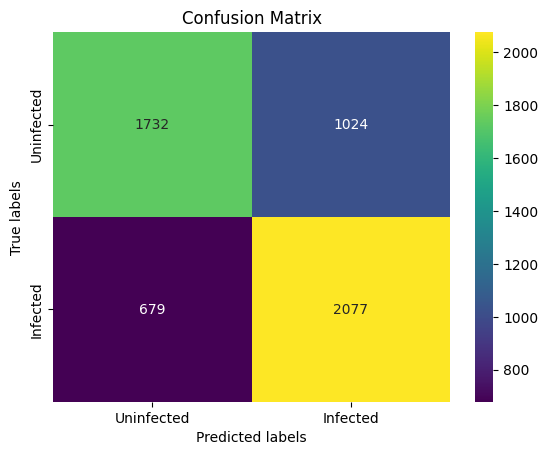

In [18]:
# Write Python Code here:

y_pred = ann1.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

print("Our accuracy is {}%".format(ann1.evaluate(X_test, y_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
labels = {'Uninfected', 'Infected'}

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Uninfected', 'Infected']); ax.yaxis.set_ticklabels(['Uninfected', 'Infected'])

In [19]:
ann1.save("ann1.h5")

### <font color='brown'> Question 5: Write your conclusions about the performance and potential use of this classifier. </font>

<b> Write answer here:</b>
#####################################################################################################################

(Double-click here)


#####################################################################################################################

© 2022 Copyright The University of New South Wales - CRICOS 00098G